In [12]:
import networkx as nx
import geopandas as gpd
import os.path as osp

In [199]:
base_dir = "/home/fiona/birdMigration/data/preprocessed/radar/fall/2016"
base_dir = "/home/fiona/birdMigration/data/raw/radar/fall/2015"
G = nx.read_gpickle(osp.join(base_dir, "delaunay.gpickle"))

In [181]:
df = gpd.read_file(osp.join(base_dir, 'voronoi.shp'))

In [182]:
df

,radar,x,y,lon,lat,boundary,geometry
0,demem,590961.340070,5.321807e+06,10.220420,48.043060,1,"POLYGON ((525856.700 5159460.434, 507938.453 5..."
1,deisn,730583.480875,5.340371e+06,12.101770,48.174700,1,"POLYGON ((681874.039 5172382.697, 652274.055 5..."
2,deess,358595.083881,5.696887e+06,6.966944,51.405556,0,"POLYGON ((265150.783 5689431.050, 344428.151 5..."
3,depro,828546.373553,5.844261e+06,13.857810,52.648570,1,"POLYGON ((758200.996 5757198.651, 713082.238 5..."
4,deoft,479495.094987,5.537104e+06,8.713970,49.985920,0,"POLYGON ((444062.948 5421860.506, 390184.583 5..."
5,detur,557728.124984,5.381651e+06,9.782780,48.585280,0,"POLYGON ((444062.948 5421860.506, 590090.372 5..."
6,deumd,648847.451805,5.781077e+06,11.176090,52.160090,0,"POLYGON ((574601.577 5720853.008, 626754.281 5..."
7,bezav,180500.339293,5.649160e+06,4.455000,50.905499,1,"POLYGON ((160396.094 5735964.557, 265150.783 5..."
8,deeis,746160.114633,5.493126e+06,12.402780,49.540660,1,"POLYGON ((894613.297 5400816.256, 659389.951 5..."
9,defbg,425511.430920,5.302728e+06,8.003860,47.873570,1,"POLYGON ((260527.771 5360517.189, 321124.303 5..."


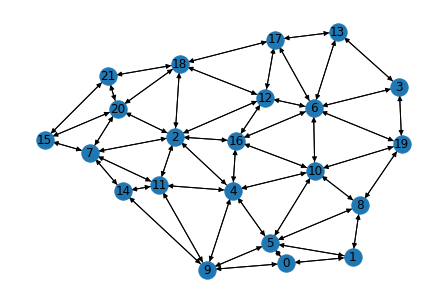

In [183]:
pos = {ridx:(df[df.radar == name].x.values[0], df[df.radar == name].y.values[0]) for (ridx, name) in nx.get_node_attributes(G, 'radar').items()}
nx.draw(G, pos=pos, with_labels=True)

In [189]:
print(G.nodes(data=True), G[1], G[0][1])

[(0, {'radar': 'demem', 'boundary': True, 'type': 'measured'}), (1, {'radar': 'deisn', 'boundary': True, 'type': 'measured'}), (5, {'radar': 'detur', 'boundary': False, 'type': 'measured'}), (9, {'radar': 'defbg', 'boundary': True, 'type': 'measured'}), (8, {'radar': 'deeis', 'boundary': True, 'type': 'measured'}), (2, {'radar': 'deess', 'boundary': False, 'type': 'measured'}), (4, {'radar': 'deoft', 'boundary': False, 'type': 'measured'}), (7, {'radar': 'bezav', 'boundary': True, 'type': 'measured'}), (11, {'radar': 'denhb', 'boundary': False, 'type': 'measured'}), (12, {'radar': 'dehnr', 'boundary': False, 'type': 'measured'}), (16, {'radar': 'defld', 'boundary': False, 'type': 'measured'}), (18, {'radar': 'deemd', 'boundary': True, 'type': 'measured'}), (20, {'radar': 'nldbl', 'boundary': False, 'type': 'measured'}), (3, {'radar': 'depro', 'boundary': True, 'type': 'measured'}), (6, {'radar': 'deumd', 'boundary': False, 'type': 'measured'}), (13, {'radar': 'deros', 'boundary': True,

In [203]:
G[9][5]

{'distance': 154.0391672987518,
 'face_length': 124.67210395037156,
 'angle': 68.19464789642234}

In [207]:
for i,j,data in G.edges(data=True):
    print(data)

{'distance': 140.85968493077044, 'face_length': 224.59425765084086, 'angle': 85.99747874559216}
{'distance': 68.47528667199421, 'face_length': 165.1477014572717, 'angle': 321.0920895728429}
{'distance': 166.60807069214636, 'face_length': 156.4825268628596, 'angle': 265.62736803732787}
{'distance': 0, 'face_length': 0, 'angle': 0}
{'distance': 140.85968493077044, 'face_length': 224.59425765084086, 'angle': 265.99747874559216}
{'distance': 177.73634969112516, 'face_length': 30.638121337160378, 'angle': 280.0402394036082}
{'distance': 153.50140046706312, 'face_length': 236.3015232617671, 'angle': 12.427373484015675}
{'distance': 0, 'face_length': 0, 'angle': 0}
{'distance': 68.47528667199421, 'face_length': 165.1477014572717, 'angle': 141.09208957284295}
{'distance': 177.73634969112516, 'face_length': 30.638121337160378, 'angle': 100.04023940360821}
{'distance': 174.09727730618042, 'face_length': 163.53808243720917, 'angle': 322.65322253616006}
{'distance': 218.95436316901717, 'face_lengt

deboo deemd <class 'shapely.geometry.linestring.LineString'>


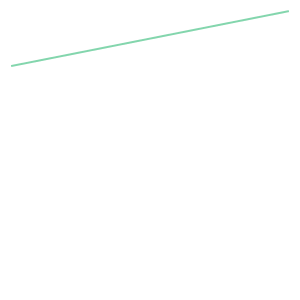

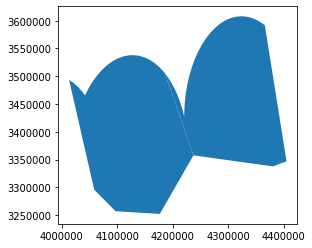

In [131]:
import itertools as it
from shapely import geometry

for i, j in it.combinations(df.index, 2):
    intersec = df.geometry.iloc[i].intersection(df.geometry.iloc[j])
    if df.iloc[i].radar in ['deemd', 'deboo'] and df.iloc[j].radar in ['deemd', 'deboo']:
        print(df.iloc[i].radar, df.iloc[j].radar, type(intersec))
        df.geometry.iloc[[i,j]].plot()
#     if df.iloc[i].radar in ['deboo', 'deros'] and df.iloc[j].radar in ['deboo', 'deros']:
#         print(df.iloc[i].radar, df.iloc[j].radar, type(intersec))
#         df.geometry.iloc[[i,j]].plot()
#     if type(intersec) is geometry.LineString:
#         print(f'edge between {df.iloc[i].radar} and {df.iloc[j].radar}')
intersec

In [132]:
df2 = df.to_crs(epsg='4326')

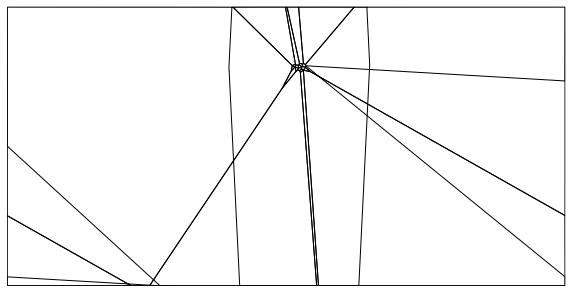

In [72]:
import geoplot as gplt
import geoplot.crs as gcrs
from matplotlib import pyplot as plt
#extent = [0.36, 46.36, 16.07, 55.40]
fig, ax = plt.subplots(figsize=(10,10), subplot_kw = {'projection' : gcrs.PlateCarree()})
# gplt.polyplot(countries, ax=ax, edgecolor="darkgray", extent=extent, zorder=1)
gplt.polyplot(df2, ax=ax)


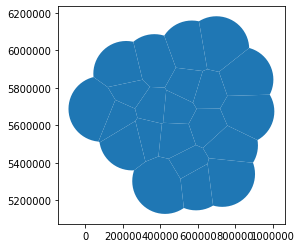

In [144]:
df.plot()

In [146]:
pts= gpd.GeoSeries([geometry.Point((x,y)) for x, y in zip(df.lon.values, df.lat.values)],
                                        crs=f'EPSG:4326')

In [147]:
proj4stereo = '+proj=stere +lat_0=0 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'

from scipy.spatial import Delaunay
import numpy as np
pts_stereo = pts.to_crs(proj4stereo)
pts_equidist = pts.to_crs(epsg='32632')
points_stereo = np.array([[p.xy[0][0], p.xy[1][0]] for p in pts_stereo])
points_lonlat = np.array([[p.xy[0][0], p.xy[1][0]] for p in pts])
points_equidist = np.array([[p.xy[0][0], p.xy[1][0]] for p in pts_equidist])

In [148]:
tri_stereo = Delaunay(points_stereo)
tri_lonlat = Delaunay(points_lonlat)
tri_equidist = Delaunay(points_equidist)

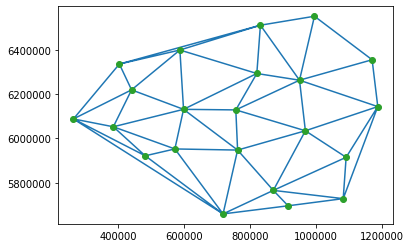

In [105]:
plt.triplot(points_stereo[:,0], points_stereo[:,1], tri_stereo.simplices)
plt.plot(points_stereo[:,0], points_stereo[:,1], 'o')
plt.show()

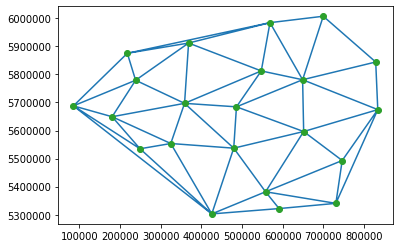

In [149]:
plt.triplot(points_equidist[:,0], points_equidist[:,1], tri_stereo.simplices)
plt.plot(points_equidist[:,0], points_equidist[:,1], 'o')
plt.show()

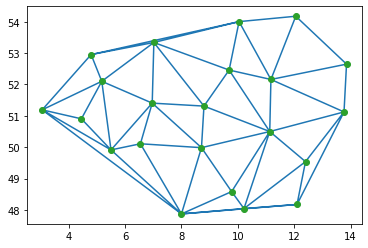

In [107]:
plt.triplot(points_lonlat[:,0], points_lonlat[:,1], tri_lonlat.simplices)
plt.plot(points_lonlat[:,0], points_lonlat[:,1], 'o')
plt.show()

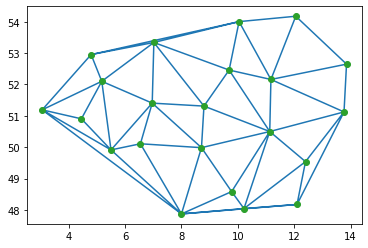

In [110]:
plt.triplot(points_lonlat[:,0], points_lonlat[:,1], tri_equidist.simplices)
plt.plot(points_lonlat[:,0], points_lonlat[:,1], 'o')
plt.show()

In [113]:
def triangle_csc(pts):
    rows, cols = pts.shape

    A = np.bmat([[2 * np.dot(pts, pts.T), np.ones((rows, 1))],
                 [np.ones((1, rows)), np.zeros((1, 1))]])

    b = np.hstack((np.sum(pts * pts, axis=1), np.ones((1))))
    x = np.linalg.solve(A,b)
    bary_coords = x[:-1]
    return np.sum(pts * np.tile(bary_coords.reshape((pts.shape[0], 1)), (1, pts.shape[1])), axis=0)

triangles = tri.points[tri.vertices]
circum_centers = np.array([triangle_csc(t) for t in triangles])

In [114]:
circum_centers

array([[-649813.1564863 , 4667158.07629746],
       [1021564.30986439, 6399962.74562343],
       [1087579.92103743, 6242448.67459066],
       [ 815438.87023309, 5681284.28183398],
       [ 983421.14201343, 5789423.44249245],
       [ 729117.95016492, 5805096.82523931],
       [ 942268.64537641, 6412413.32547266],
       [-278548.7674633 , 8607599.63786197],
       [ 263035.57167161, 5861847.83572536],
       [ 675368.99072182, 6035927.19793258],
       [ 900159.87549407, 5906881.49177855],
       [1044040.18158969, 6155770.58171902],
       [ 889230.88467775, 6143684.92386395],
       [ 843339.34860765, 6040952.24081558],
       [ 730780.39110061, 6407351.07598601],
       [ 912656.53703329, 6398273.64136948],
       [ 862205.08268041, 6182609.09636601],
       [ 678848.30326235, 6253667.04168969],
       [ 667830.34891271, 6268792.06591419],
       [ 515456.5493304 , 6307797.06909283],
       [ 568423.55297336, 6264664.93614028],
       [ 483590.60624646, 6112605.56930222],
       [ 2